In [1]:
import sys
print(sys.executable)


d:\python 3.10.11\python.exe


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [3]:
# Transform: convert images to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),   # convert image to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))   # normalize to [-1, 1]
])

# Download & load training data
trainset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform
)
trainloader = torch.utils.data.DataLoader(
    trainset, batch_size=32, shuffle=True
)

# Download & load test data
testset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(
    testset, batch_size=32, shuffle=False
)


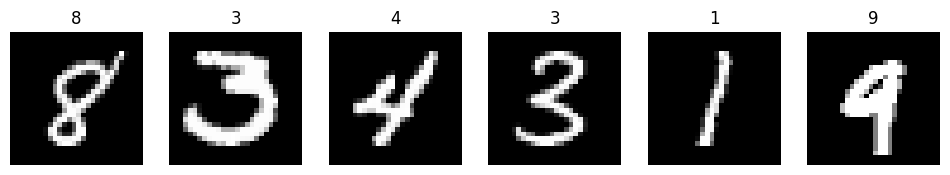

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images from the training set
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show first 6 images
fig, axes = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    ax = axes[i]
    img = images[i].numpy().squeeze()  # convert tensor to numpy array
    ax.imshow(img, cmap='gray')
    ax.set_title(labels[i].item())
    ax.axis('off')
plt.show()


In [5]:
import torch.nn as nn

# Define a simple neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # input layer: 28*28 pixels → 128 neurons
        self.fc2 = nn.Linear(128, 64)     # hidden layer: 128 → 64
        self.fc3 = nn.Linear(64, 10)      # output layer: 10 classes (digits 0-9)

    def forward(self, x):
        x = x.view(-1, 28*28)            # flatten 28x28 image to 1D vector
        x = torch.relu(self.fc1(x))      # activation after first layer
        x = torch.relu(self.fc2(x))      # activation after second layer
        x = self.fc3(x)                  # final output (logits)
        return x

# Instantiate the model
model = SimpleNN()
print(model)


SimpleNN(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


In [6]:
import torch.optim as optim

# Loss function: CrossEntropyLoss (good for multi-class classification)
criterion = nn.CrossEntropyLoss()

# Optimizer: Adam (popular and effective)
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [7]:
# Number of epochs
num_epochs = 5

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        # Zero the gradient buffers
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(trainloader):.4f}")


Epoch [1/5], Loss: 0.3353
Epoch [2/5], Loss: 0.1604
Epoch [3/5], Loss: 0.1211
Epoch [4/5], Loss: 0.1004
Epoch [5/5], Loss: 0.0887


In [8]:
# Test the model
correct = 0
total = 0

with torch.no_grad():  # no gradient calculation needed
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # get class with highest score
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 97.11%


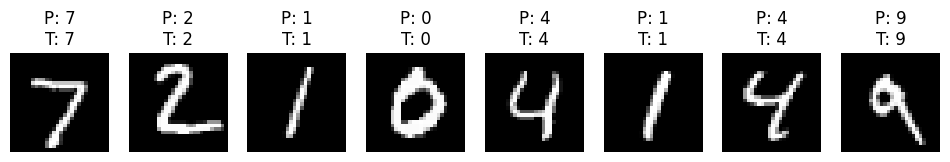

In [11]:
# Get a batch of test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Get predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Plot first 6 images with predictions
fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i in range(8):
    ax = axes[i]
    img = images[i].numpy().squeeze()  # convert tensor to 2D numpy array
    ax.imshow(img, cmap='gray')
    ax.set_title(f"P: {predicted[i].item()}\nT: {labels[i].item()}")
    ax.axis('off')
plt.show()


# MNIST Actual handwritten image

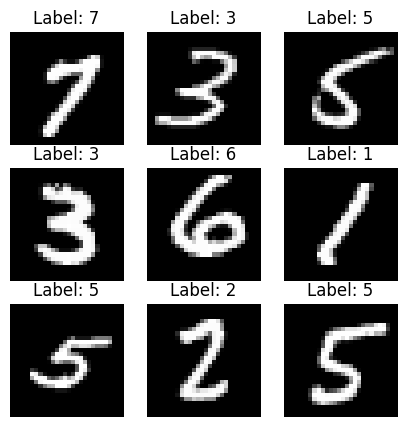

In [23]:
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Convert images to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load MNIST test data
testset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform
)
testloader = torch.utils.data.DataLoader(testset, batch_size=9, shuffle=True)

# Get one batch of 9 images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Plot them
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')
    ax.set_title(f"Label: {labels[i].item()}")
    ax.axis('off')
plt.show()
